# Marketing segmentation example 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

# Loading Data

In [2]:
data = pd.read_csv('3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Satisfaction here is a discrete value which takes integer values.


Loyality is here measure as 'purschase for 1y + other factors', countinous value and range(-2.5 to 2.5)

# Plotting Data

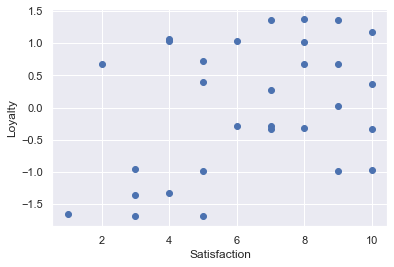

In [3]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

# Feature Selection

In [4]:
x = data.copy()

# Clustering

In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [6]:
clusters = x.copy()
clusters['Clustered_result']= kmeans.fit_predict(x)
clusters

,Satisfaction,Loyalty,Clustered_result
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


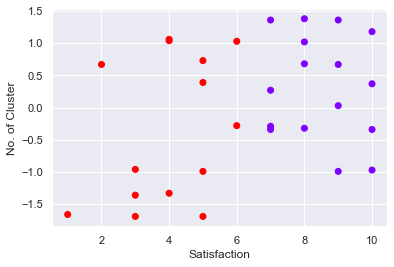

In [7]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['Clustered_result'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('No. of Cluster')
plt.show()

There is a cut-off line at 6, which seprates both clusters.

Here satisfaction will be treated as a feature because we didn't standardize it.

# Standazing 

In [8]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

After standardizing we must know how many cluster is needed? It is done by Elbow Method

# Applying Elbow Method

In [9]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [10]:
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.560316417082464,
 4.352037765292863,
 3.731185392455718]

Text(0, 0.5, 'WCSS')

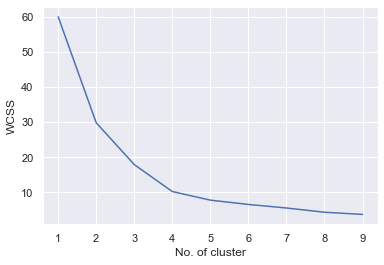

In [11]:
plt.plot(range(1,10), wcss)
plt.xlabel('No. of cluster')
plt.ylabel('WCSS')

Here we can observe that change in curve respect to no. of clusters are at 2,3,4,5.

# Explore clustering solutions and select the number of clusters

In [12]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['Cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [13]:
cluster_new

,Satisfaction,Loyalty,Cluster_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,3
9,8,0.68,3


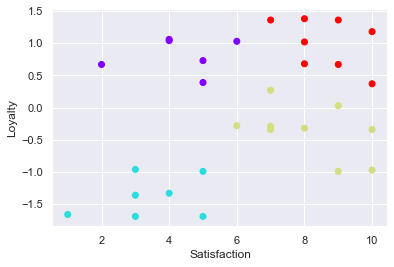

In [14]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['Cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [15]:
sns.clustermap('cluster_new')

ValueError: DataFrame constructor not properly called!